In [ ]:
# this is some code to get pretty highlighted cells for the questions - ignore this
from IPython.display import HTML
style1 = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style1)

This notebook covers some worked examples and some examples for you to try relating to **Block A, Chapter 3** in the notes.  This is practice and core material for coursework 1. The green questions are those most closely related to the assessed work for this module. *Once you have completed this notebook, you will be able to attempt part of QN 5 on coursework 1.*

## Core concepts:

**Degrees of Freedom**

This should illustrate a little more what degrees of freedom mean. Suppose we collect a random sample of observations. Now, imagine that we know the mean equals 6.9, but we don’t know the value of one of our observations (the X) in the list of values:

data = [6,8,5,9,6,8,4,11,7,X]

So we know that the (sum(data)+X)/N = mean. As $N=10$ this means sum(data)+X = 69 ie X has to be equal to 5. As you can see, the last number has no freedom to vary. It is not an independent piece of information because it cannot be any other value.  Therefore when we next use the mean to derive a standard deviation, it means we already have lost 1 degree of freedom.  Therefore we need to account for this $N-1$ to ensure that the standard deviation of our sample is unbiased.

**Errors**

Let's first assume that we have a function $f$ that is dependent on some measured quantity $x$, and yields a value $y$ that we are interested in knowing, such that $y = f(x)$. Now the measurements of $x$ are associated with some random error, $\sigma_x$, and so the final value of $y$ will also have an error $\sigma_y$. How do we calculate $\sigma_y$?

Assuming the errors in $x$ are small, and are close to the true value $\hat{x}$, we can expand $f(x)$ around the point $\hat x$,

$f(x) = f(\hat x) + (x - \hat x) \left( \dfrac{df} {dx} \right)_{\hat x}  + \dotsb$

If we now identify $\hat y = f(\hat x)$, then we can see that,

$y - \hat y = f(x) -  f(\hat x) \approx  (x - \hat x) \left( \dfrac{df} {dx} \right)_{\hat x}.$

which gives us an expression for how the value of $y$ derived from our measured value of $x$, relates to the true values of both $y$ and $x$, which are given by $\hat y$ and $\hat x$. If we then take many measurements of $x$, we can use the expression above to write the standard deviation about the mean, as

$\dfrac {1}{N}\sum_i^N (y_i - \hat y)^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \dfrac {1}{N}\sum_i^N (x_i - \hat x)^2$

or simply,

$\sigma_y^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \, \sigma_x^2$

which is the result you are probably familiar with from your first year labs!  

For two variables, we get the following: 

$\sigma_z^2 = \left( \dfrac{\partial f} {\partial x} \right)^2 \sigma_x^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 \sigma_y^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y} \sigma_{xy}.$

Ignoring the last term on the RHS for a moment, we see that the expression is the normal error propagation formula that you learnt during your lab work (for independent errors). If  $\sigma_x$ and $\sigma_y$ are not independent, then we need the last term! This is called the *covariance*.

$\sigma_{xy} = \dfrac{1}{N}\sum (x - \hat x) (y - \hat y).$

The variance of a variable describes how much the values are spread. The covariance is a measure that tells the amount of dependency between two variables. A positive covariance means that the values of the first variable are large when the values of the second variables are also large. A negative covariance means the opposite: large values from one variable are associated with small values of the other. 

*Problems with covariance:*

The problem with covariance is that it keeps the scale of the variables $X$ and $Y$, and therefore can take on any value. This makes interpretation difficult and comparing covariances to each other impossible. For example, $\sigma_{XY}  = 5.2$ and $\sigma_{ZQ}= 3.1$ tell us that these pairs are positively associated, but it is difficult to tell whether the relationship between $X$ and $Y$ is stronger than $Z$ and $Q$ without looking at the means and distributions of these variables.  We can normalise the covariance to give us both direction and strength of the correlation between these parameters. 

### Correlation

Two variables may have a positive association, so that as the values for one variable increase, so do the values of the other variable. Alternatively, the association could be negative or neutral. Correlation quantifies this association, often as a measure between the values -1 to 1 for perfectly negatively correlated and perfectly positively correlated. The calculated correlation is referred to as the “correlation coefficient.” This correlation coefficient can then be interpreted to describe the measures.

For a linear function, the extent to which data points $(x_1, y_1)... (x_N, y_N)$ support a linear correlation is given by the *linear correlation coefficient* sometimes called the Pearson correlation coefficient,

$r =  \dfrac{\sigma_{xy}} {\sigma_x\,\sigma_y}$
$ r = \dfrac{\sum(x - \hat x)(y - \hat y)} { \sqrt{\sum (x - \hat x)^2 \sum ( y- \hat y)^2} }.
$

If $r$ is close to $\pm 1$, then we would say that the points are correlated.  Completetly uncorrelated points would have $r=0$. 

But, if we look at standard probability tables (see table below), the probability of getting $r \ge 0.7$ is 51% for $N=3$ *even if 2 variables are uncorrelated*.  Therefore we should combine our $r$ correlation value with some measure of the probability of getting that value given the dataset randomly.  See the next workbook.

![alt text](ro.png "Title")

**Covariance Matrix**

The covariance matrix is a matrix that summarises the variances and covariances of a set of parameters.  Typical python data fitting routines will return this matrix. The diagonal of the matrix corresponds to the variance between the parameters. The sample variance is given by:

$\sigma^2 = \dfrac{1}{n-1} \sum_{i=1}^n (x-\hat{x})^2$

with $n$ the number of data points, and $\hat{x}$ the mean. The covariance is given by

${\rm cov}(x,y) \dfrac{1}{n-1} \sum_{i=1}^n  (x-\hat{x})(y-\hat{y})$.

The covariance matrix for a set of data denoted by matrix **X** can also be created using the following method: 

${\bf x} = {\bf X} - {\bf 11^T}{\bf X} ( 1 / n )$

where $n$ is the number of rows in the data matrix **X**, **1** is an $n \times 1$ column vector of ones. $1^T$ is the transpose of matrix *1*. 

Then we compute ${\bf x^Tx}$, the $k \times k$ deviation sums of squares and cross products matrix for **x**. Then we divide each term in the deviation sums of squares and cross product matrix by $n$ to create the variance-covariance matrix:

${\bf V} = {\bf x^Tx} ( 1 / n ).$

## Null hypothesis testing

The general framework we have looked at in lectures is referred to as *Null Hypothesis Significance Testing*, which we will abbreviate as *NHST*.  Hypothesis testing is the bread and butter of inferential statistics and a critical skill in the repertoire of a data scientist. 

Given an unknown parameter $\theta$, and a dataset $X={x_1,x_2,..}$ with probability of getting the data given by $p(X,\theta)$, does $X$ support the idea that $\theta$ is within a set of possible values $\Theta$? Classical hypothesis testing is based around two concepts:

\begin{align}
H_0 &:&~\theta \in \Theta_0 &~~ \text{the null hypothesis} \\
H_1 &:&~\theta \in \Theta_1 &~~ \text{the alternative hypothesis}
\end{align}

The null hypothesis assumes that nothing interesting happens/happened. The alternative hypothesis is, where the action is i.e. some observation/ phenomenon is real (i.e. not a fluke) and statistical analysis will give us more insights on that.

Statisticians take a pessimistic sort of view and start with the Null hypothesis ie the *null* hypothesis is what we are going to assume is true, thought ww are normally trying to show that it is not!  We then compute a statistic and then ask "What is the chance of observing the test-statistic for this sample (considering its size and the probability governing the system), purely randomly (ie if the Null hypothesis were true)?"

This chance — probability value of observing the test-statistic — is the so-called $p-$value. 

Remember, you cannot prove that something is correct in classical hypothesis testing, only prove that it is wrong. This is why the errors focus on $H_0$ -- at best you can (correctly) accept that $H_0$ is correct, and thus our hypothesis that  $\theta \in \Theta_1$ is wrong.

***
## Worked example of Correlation:


In [ ]:
import numpy as np
import pylab as plt
from numpy.random import randn

# the line below makes the plot appear in the jupyter notebook
%matplotlib inline  

def cov(x,y,n):
    x_hat = np.mean(x)
    y_hat = np.mean(y)
    return np.sum((x-x_hat)*(y-y_hat))/(n-1)

# let's generate some random data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 *randn(1000) + 50)
n = len(data1)

# let's work out mean of the data
xhat = np.mean(data1)
yhat = np.mean(data2)

print('the mean of x is {:.2f}'.format(xhat))
print('the mean of y is {:.2f}'.format(yhat))

# covariance between the datasets
covar = cov(data1,data2,n)
print('the covariance between x and y is {:.2f}'.format(covar))

# plot
plt.scatter(data1, data2)
plt.xlabel('data1')
plt.ylabel('data2')
plt.show()

As we know (as we created the fake data), the data looks to be highly correlated. Now it's not too much more work to calculate the linear correlation coefficient $r$. Here we will see how to do this using the inbuilt python function from the `scip.stats` package. Many of the things we'll do in the course have inbuilt routines in python but part of the coursework will see you doing it from scratch to check understanding.

In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation is: %.3f' % corr)

We know from our notes that this value of $r$ indicates that the data is strongly correlated. 

***
## Worked example of Covariance:

Let's start with some data written as a matrix **A**:

\begin{equation}
{\bf A} = \begin{bmatrix}
1	& 3&	5 \\
5 & 4 &	1   \\
3 & 8      &	6\\
\end{bmatrix}
\end{equation}


We will calculate the covariance between the first and the third column vectors:

\begin{equation}
{\bf x} =  \begin{bmatrix}
1 \\
5 \\
3 \\
\end{bmatrix}
\end{equation}

and

\begin{equation}
{\bf y} = \begin{bmatrix}
5 \\
1 \\
6 \\
\end{bmatrix}
\end{equation}


**Answer:**

We can do a simple covariance calculation in python:

In [ ]:
x = [1,5,3]
y = [5,1,6]

def cov(x,y,n):
    x_hat = np.mean(x)
    y_hat = np.mean(y)
    return np.sum((x-x_hat)*(y-y_hat))/n

n = len(x)

print('the covariance between x and y is {:.3f}'.format(cov(x,y,n)))

Or we can create the covariance matrix using the array manipulation, where first, we transform the raw scores in matrix **A** to deviation scores (differences between the score and the mean) in matrix **a**, (given that *1* is a $n \times 1$ column vector):

$ {\bf 1 } = \begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix} \rightarrow {\bf 1^T} =\begin{bmatrix}
1 & 1 & 1\\
\end{bmatrix} $

${\bf a} = {\bf A} - {\bf 11^T}{\bf A} ( 1 / 3 )$ such that


\begin{equation}
{\bf a} = \begin{bmatrix}
1 &  3 & 5\\
5 & 4 & 1\\
3 & 8 & 6\\
\end{bmatrix}- \begin{bmatrix}
1 & 1 &1  \\
1 & 1 &1  \\
1 & 1 &1  \\
\end{bmatrix} \begin{bmatrix}
1 &  3 & 5\\
5 & 4 & 1\\
3 & 8 & 6\\
\end{bmatrix} \times (1/5)
\end{equation}

*Tip:* If you want to do this in python, I'd suggest using `a = np.matrix('1 3 5; 5 4 1;3 8 6')` to formate the matrix, then it's easy to transpose using `a.transpose()`.

*** 
## Your turn:


<div class="alert alert-block alert-success">
**Question on NHST:** <br><br>
A company releases a new ski wax that it claims (naturally) is superior to its rivals, and greatly reduces the friction between skis and snow. A skiing magazine decides to test the claim by performing an experiment. They take 10 pairs of skis, and treat one ski from each pair -- the left one -- with the new wax, and the other (the right) ski with the wax from a competing brand. Each pair of skis are then released from the top of a ramp in turn, and they record which of the two skis reach the bottom of the ramp first.    The team find that the new skis win 8 of the 10 races. 
 </div>

**Answer:**

Our null hypothesis: there is no difference between the two waxes.
and our alternate hypothesis is that the new wax is better than the old wax

<div class="alert alert-block alert-success">**Question on Correlation:** <br><br>

The datafile worldpopulation.txt contains the world population size measured since 1960. Plot the data. <br><br>

Measure the correlation coefficient using the in built Python package for Pearson's statistic. <br><br>

Measure it again but this time creating the function to calculate $r$ from scratch.   You will need this for your CA 1.
</div>
    

**Answer:**

[[1.         0.93489875]
 [0.93489875 1.        ]]
0.9348987482423317


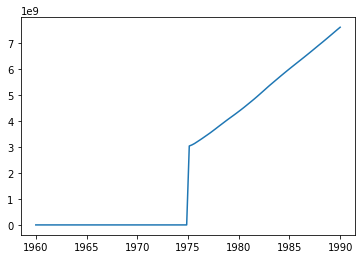

In [5]:
import numpy as np
import pylab as plt


with open('/home/cot12/worldpopulation.txt', 'r') as ins:
    array = []
    for line in ins:
        line = line.strip('\n')
        z = float(line)
        array.append(z)
y = array
x = np.linspace(1960, 1990, 118)
w = np.corrcoef(x,y)
print(w)
plt.plot(x, y)

def pr(X_array, Y_array):
    mean_X = np.mean(X_array)
    mean_Y = np.mean(Y_array)
    top = np.sum(((X_array - mean_X)*(Y_array - mean_Y)))
    bottom = np.sqrt((np.sum((X_array - mean_X)**2))*(np.sum((Y_array - mean_Y)**2)))
    r = top/bottom
    return r

calR = pr(x,y)
print(calR)

<div class=warn> **Question:** <br><br>
Suppose a group of 5 students take 3 exams, in English, Maths and Art.  Can you find any evidence to support the notion that students that do well in Art tend to do poorly in Maths?  The results are given below.  Do this calculation from "scratch" ie don't use inbuilt python routines for covariance. </div> 

| Student | Maths | English | Art  |
| --- | --- | ---| ---| ---|
|1	|90	|60	|90 |
|2	|90	|90	|30 |
|3	|60	|60	|60 |
|4	|60	|60	|90 |
|5	|30	|30	|30 |

**Answer:**

0.2988071523335984


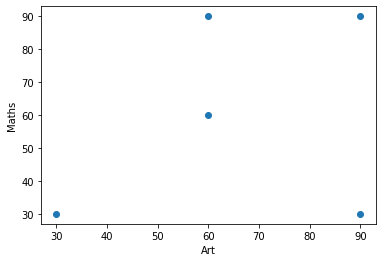

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Maths = [90,90,60,60,30]
English = [60,90,60,60,30]
Art = [90,30,60,90,30]

def pr(X_array, Y_array):
    mean_X = np.mean(X_array)
    mean_Y = np.mean(Y_array)
    top = np.sum(((X_array - mean_X)*(Y_array - mean_Y)))
    bottom = np.sqrt((np.sum((X_array - mean_X)**2))*(np.sum((Y_array - mean_Y)**2)))
    r = top/bottom
    return r
calR = pr(Art,Maths)
print(calR)
plt.xlabel('Art')
plt.ylabel('Maths')
plt.scatter(Maths, Art)

*Your answer here:*
    
So from the Correlation Coefficient for direct relationship as r~0.3, this gives that our relationship strength to moderate. This means that on average students who do bad at art do well at maths.

<div class =warn>** Question:** <br><br>
Show that the error equation for a parameter $z = f(x, y)$ is given by: <br><br>

$\sigma_z^2 = \left( \dfrac{\partial f} {\partial x} \right)^2 \sigma_x^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 \sigma_y^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y} \sigma_{xy}.$ 
</div>

**Answer:**

Let's first assume that we have a function $f$ that is dependent on some measured quantity $x$, and yields a value $y$ that we are interested in knowing, such that $y = f(x)$. Now the measurements of $x$ are associated with some random error, $\sigma_x$, and so the final value of $y$ will also have an error $\sigma_y$. How do we calculate $\sigma_y$?

Assuming the errors in $x$ are small, and are close to the true value $\hat{x}$, we can expand $f(x)$ around the point $\hat x$,

$f(x) = f(\hat x) + (x - \hat x) \left( \dfrac{df} {dx} \right)_{\hat x}  + \dotsb$

If we now identify $\hat y = f(\hat x)$, then we can see that,

$y - \hat y = f(x) -  f(\hat x) \approx  (x - \hat x) \left( \dfrac{df} {dx} \right)_{\hat x}.$

which gives us an expression for how the value of $y$ derived from our measured value of $x$, relates to the true values of both $y$ and $x$, which are given by $\hat y$ and $\hat x$. If we then take many measurements of $x$, we can use the expression above to write the standard deviation about the mean, as

$\dfrac {1}{N}\sum_i^N (y_i - \hat y)^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \dfrac {1}{N}\sum_i^N (x_i - \hat x)^2$

or simply,

$\sigma_y^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \, \sigma_x^2$

which is the result you are probably familiar with from your first year labs!  

For two variables, we get the following: 

$\sigma_z^2 = \left( \dfrac{\partial f} {\partial x} \right)^2 \sigma_x^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 \sigma_y^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y} \sigma_{xy}.$

